In [65]:
install.packages('tidyverse')
install.packages('gridExtra')

library(tidyverse)
library(gridExtra)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Ex.1 
* study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial. Assume the following priors:
    - a uniform distribution 
    - a Jeffrey's prior
    - a step function:
* plot the posterior distribution and summerize the results computing the first two moments
* compute a 95% credibility interval and give the results in a summary table
* draw the limits on the plot of the posterio distribution


### Uniform distribution prior
the normalization P($\pi$|H) dosen't depend on $\pi$

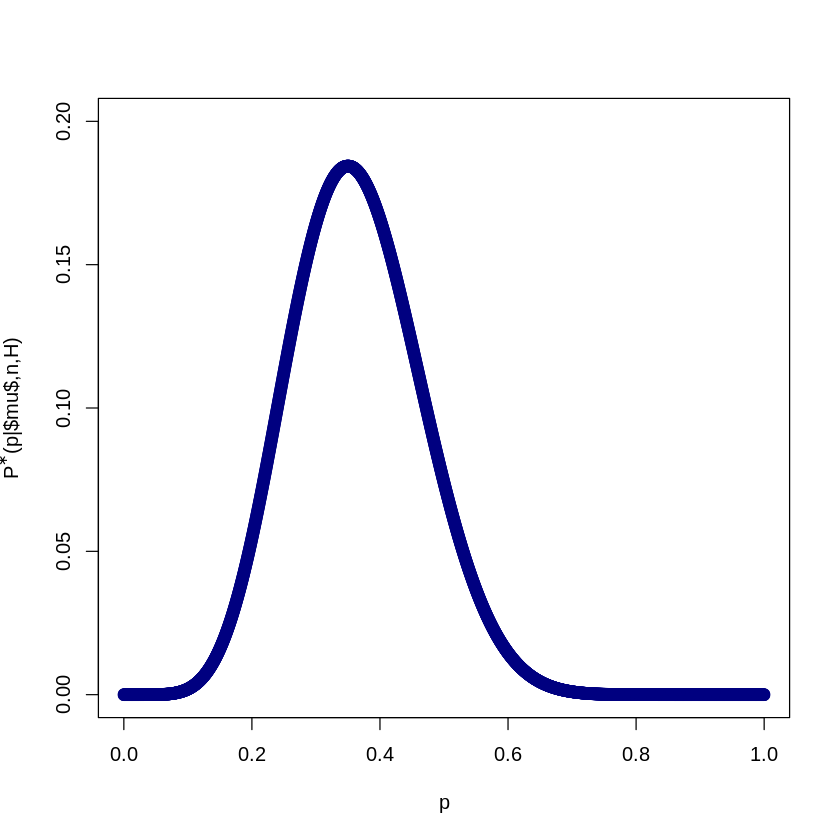

In [5]:
y <- 7   #success
n <- 20  #number of trial
mu <- seq(0,1, length.out=1000)
p.post_notnorm <- dbinom(x=y, size=n, prob=p)
plot(p, p.post_notnorm,
     col='navy', lty=1, lwd=3,
     ylim=c(0,0.2),
     xlab='p',
     ylab=expression(paste(P^symbol('*'), '(p|$mu$,n,H)')))

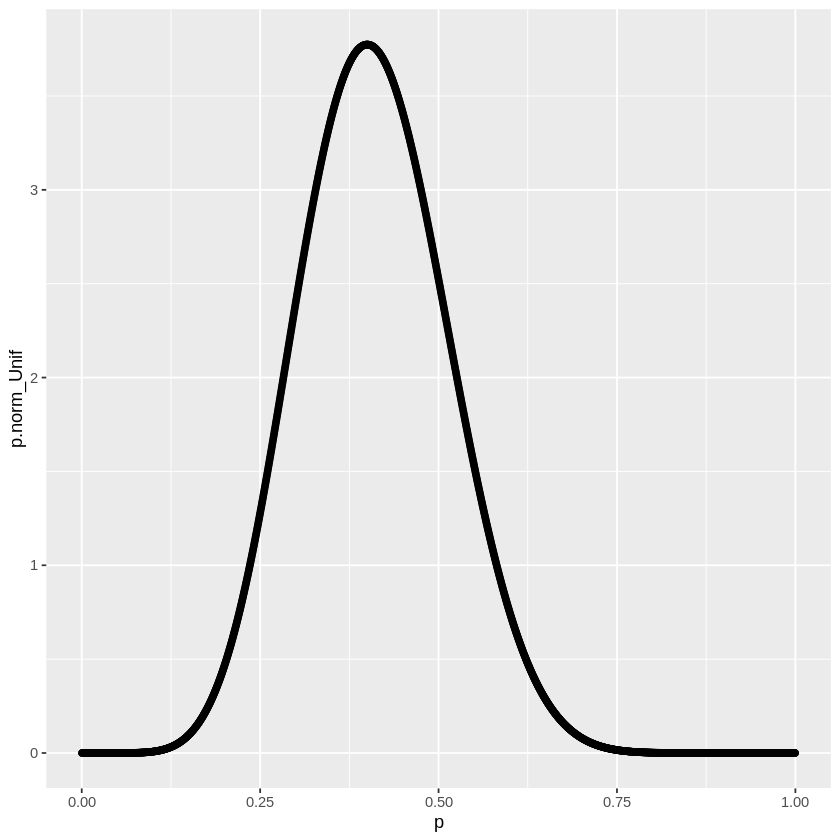

In [58]:
y <- 8
n <- 20; 
n.sample <- 2000 #number of interval in which calculate the approximate normalization function
delta.p <- 1/n.sample #length of the interval
mu <- seq(from = 1/(2*n.sample), by=1/n.sample, length.out = n.sample) #possible chose of the p in the binomial distribution, called mu 

p.star_Unif <- dbinom(x=y, size=n, prob=mu)
p.norm_Unif <- p.star_Unif/(delta.p * sum(p.star_Unif))
# plot(p, p.norm, col='red')
# points(p, p.star, col='navy')
ggplot() +
geom_point(aes(p, p.norm_Unif)) 

### Jeffrey's Prior
it is a prior invariant under any continous transformation of the parameter:
g($\mu$) $\propto$ $\frac{1}{\sqrt \mu}$ for $\mu > 0$

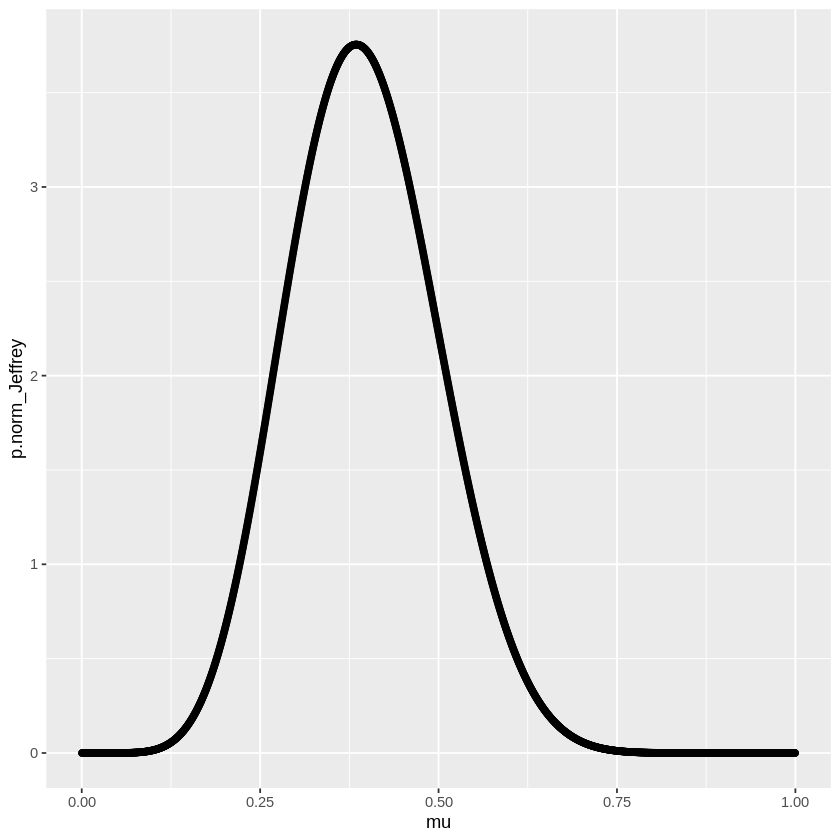

In [59]:
y <- 8
n <- 20
n.sample <- 2000
delta.p <- 1/n.sample
mu <- seq(from = 1/(2*n.sample), by=1/n.sample, length.out = n.sample)

#p.star <- dgamma(mu, shape=(y+1/2), scale=n)
# p.norm <- p.star / (delta.p * sum(p.star))
#p.norm_Jeffrey <- p.star / (integrate(function(k) {dgamma(k, shape=(y+1/2), scale=n)}, lower = 0, upper = 1))$value #return the same as the aproximated version

p.star_Jeffrey <- dbinom(x=y, size=n, prob=mu) * 1/((mu)**(1/2))
p.norm_Jeffrey <- p.star_Jeffrey / integrate(function(k) {dbinom(x=y, size=n, prob=k) * 1/((k)**(1/2)) }, lower = 0, upper = 1)$value


ggplot() +
geom_point(aes(mu, p.norm_Jeffrey))

### Step function

In [60]:
y <- 8
n <- 20
mu <- seq(0,1,length.out = 2000)

g  <- function(k) {
        g.val <- ifelse(k <= 0.2,
                        k,
                        ifelse(k > 0.2 & k <= 0.3,
                               0.2,
                               ifelse(k > 0.3 & k <= 0.5,
                                      0.5 - k,
                                      ifelse(k>0.5,
                                            0,
                                            0)
                                     )
                              )
                        )
        return(g.val)       
}

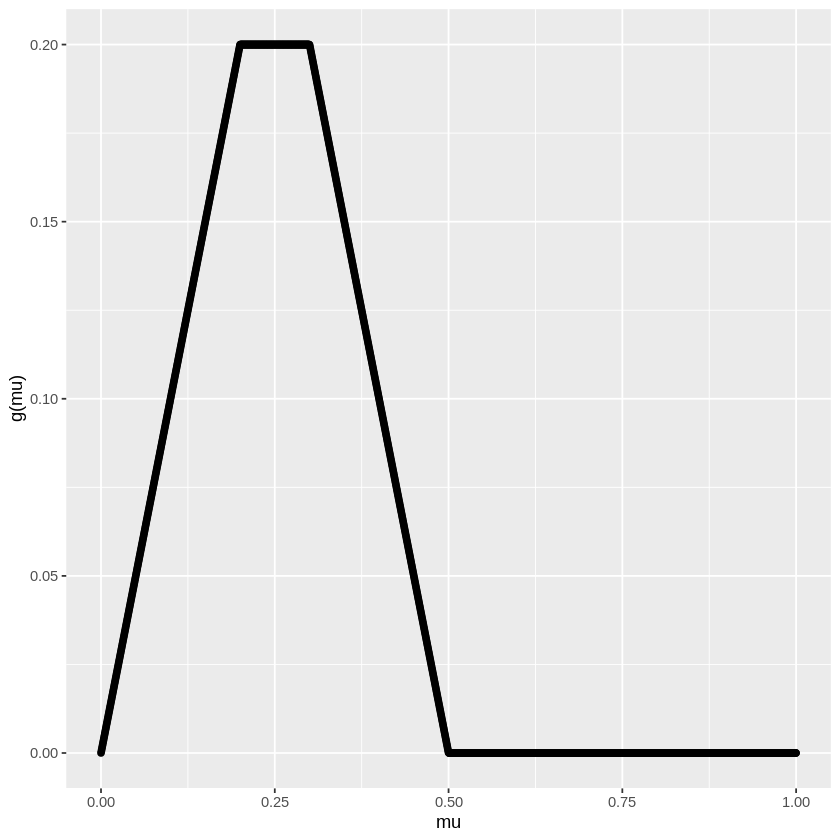

In [61]:
ggplot()+
geom_point(aes(mu, g(mu)))

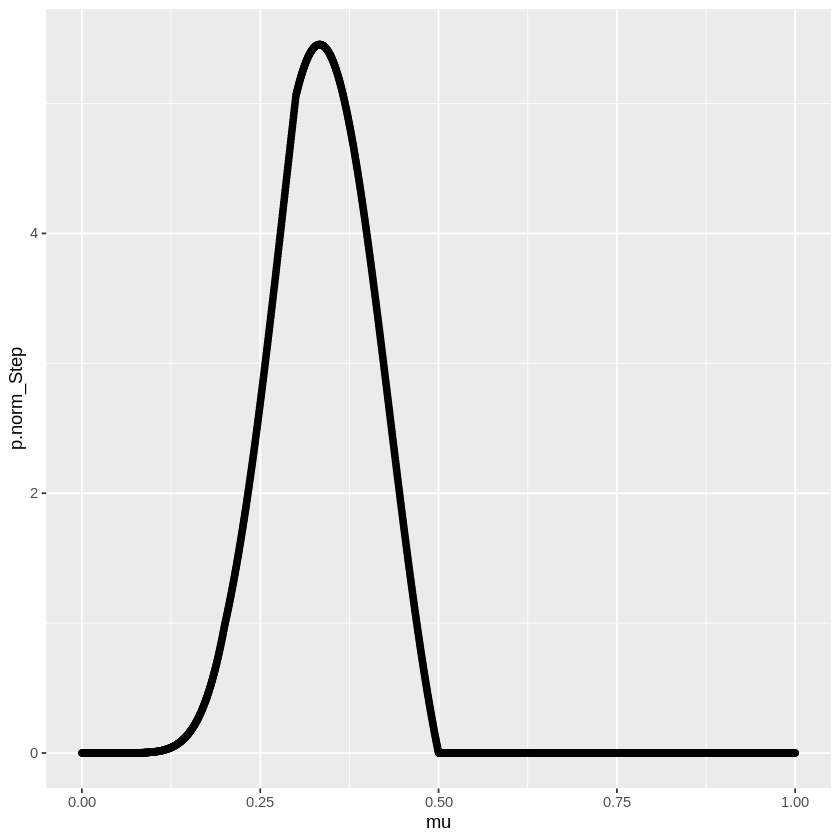

In [62]:
p.star_Step <- dbinom(x=y, size=n, prob=mu) * g(mu)
p.norm_Step <- p.star_Step/ (integrate(function(k) {dbinom(x=y, size=n, prob=k) * g(k)}, lower = 0, upper = 1))$value 

ggplot() +
geom_point(aes(mu, p.norm_Step))

# Display of the three Posterior

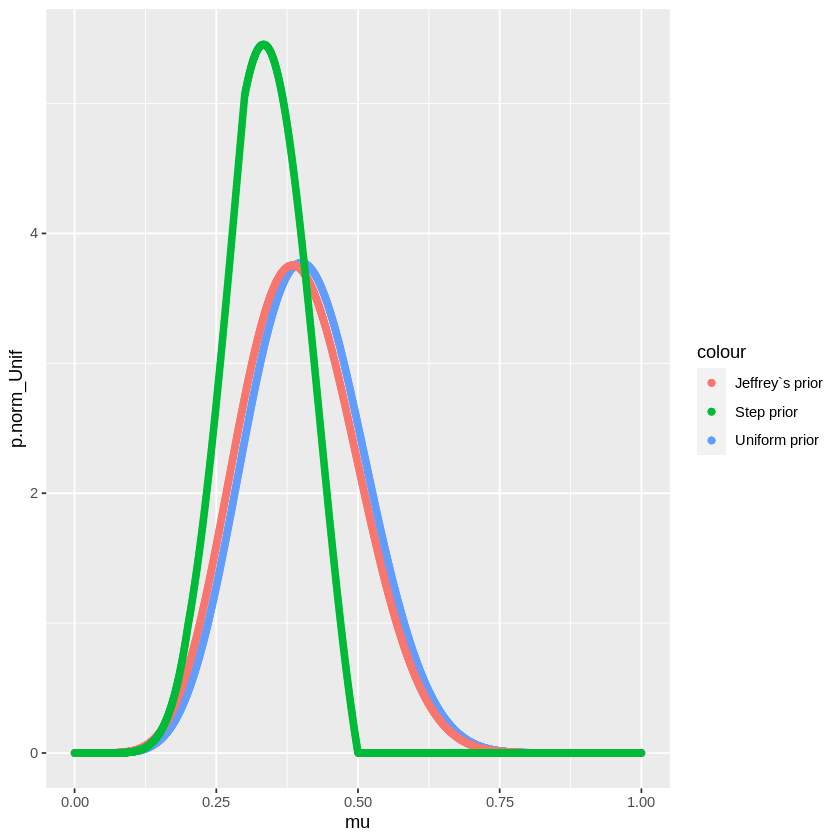

In [64]:
ggplot() +
geom_point(aes(mu, p.norm_Unif, color='Uniform prior')) +
geom_point(aes(mu, p.norm_Jeffrey, color='Jeffrey`s prior')) +
geom_point(aes(mu, p.norm_Step, color='Step prior')) -> posterior_plot
posterior_plot

## First and Second Momenta

In [ ]:
first_Unif <- integrate(function(t){dbinom(x=y, size=n, prob=t)*t}, lower=0, upper=1)$value / integrate(function(k){})



first_Jeffrey



first_Step